# Logistic Regression Examples

### Using randomly generated customer data to determine the likelihood of them purchasing an Elite package

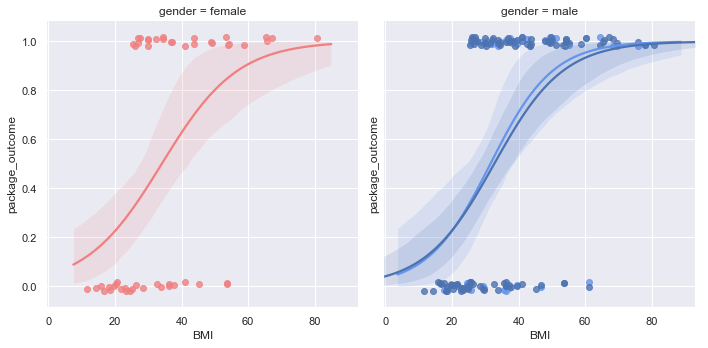

In [12]:
from pymedtermino import *
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


customer_info = []
for x in range(100):
    packages = ['Essentials', 'Elite', 'Gut Health']
    genders=['male','female']
    weight = random.randint(100,300)
    height = random.randint(48, 80)
    package_select=random.randint(0, 1)
    gender_select=random.randint(0, 1)
    random_generator = random.randint(0, 10)
    package = packages[package_select]
    gender=genders[gender_select]
    BMI = 703*weight/height**2
    if random_generator > 3 and BMI > 25:
        packages='Elite'
        package_outcome=1
    else:
        packages="Essentials"
        package_outcome=0
    customer_info.append([BMI, weight, height, packages,package_outcome,gender])
customer_info = pd.DataFrame(customer_info, columns=['BMI', 'weight', 'height','package','package_outcome','gender'])

import seaborn as sns
sns.set(style="darkgrid")

# Load the example titanic dataset

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="BMI", y="package_outcome", col="gender", hue="gender", data=customer_info,
               palette=pal, y_jitter=.02, logistic=True)
sns.set(style="darkgrid")

h = sns.regplot(x="BMI", y="package_outcome",data=customer_info,
                y_jitter=.02, logistic=True)



In [34]:
import statsmodels.discrete.discrete_model as sm
from sklearn.linear_model import LogisticRegression

# model = sm.GLM(customer_info.BMI, customer_info.package_outcome,family=sm.families.Binomial())
# result = model.fit()
# result.summary()  

model = LogisticRegression(fit_intercept = False, C = 1e9)
mdl = model.fit(customer_info.BMI, customer_info.package_outcome)
model.coef_

# sm
logit = sm.Logit(customer_info.package_outcome, customer_info.BMI)
logit.fit().params



Optimization terminated successfully.
         Current function value: 0.645757
         Iterations 4


BMI    0.015842
dtype: float64

# Rupa Health Growth Prediction
### Predicting company growth depending on expected cost growth vs. customer growth

Text(0,0.5,'Cumulative Costs')

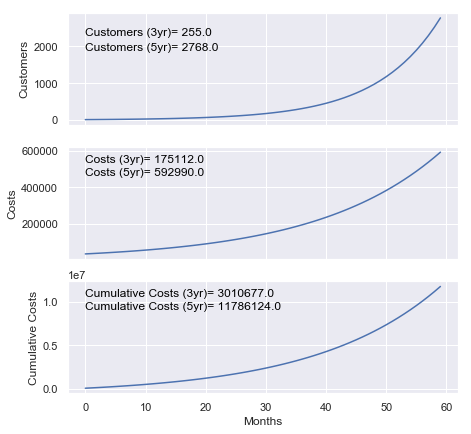

In [75]:
months=[0]
growth=[0]
cum_growth = [0]
costs = [0]
cum_costs = [0]
for month in range(0,60):
    initial=10
    customers = initial*1.1**month
    months.append(month)
    growth.append(customers)
    cost_monthly = 4*100000/12*1.05**month
    costs.append(float(cost_monthly))
    cum_costs.append(np.sum(cum_costs[month]+cost_monthly))
    
f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(7,7), sharex=True)

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.xlabel('Months')
y_axis_labels=['Customers','Costs','Cumulative Costs']

p1=sns.lineplot(months[1:],growth[1:],ax=ax1)
p2=sns.lineplot(months[1:],costs[1:],ax=ax2)
p3=sns.lineplot(months[1:],cum_costs[1:],ax=ax3)
p1.text(months[1], growth[-5], str(y_axis_labels[0])+' (5yr)= '+str(np.round(growth[-1],)), horizontalalignment='left', size='medium', color='black')
p2.text(months[1], costs[-6], str(y_axis_labels[1])+' (5yr)= '+str(np.round(costs[-1],)), horizontalalignment='left', size='medium', color='black')
p3.text(months[1], cum_costs[-6], str(y_axis_labels[2])+' (5yr)= '+str(np.round(cum_costs[-1],)), horizontalalignment='left', size='medium', color='black')

p1.text(months[1], growth[-3], str(y_axis_labels[0])+' (3yr)= '+str(np.round(growth[35],)), horizontalalignment='left', size='medium', color='black')
p2.text(months[1], costs[-3], str(y_axis_labels[1])+' (3yr)= '+str(np.round(costs[35],)), horizontalalignment='left', size='medium', color='black')
p3.text(months[1], cum_costs[-3], str(y_axis_labels[2])+' (3yr)= '+str(np.round(cum_costs[35],)), horizontalalignment='left', size='medium', color='black')


ax1.set_ylabel(y_axis_labels[0])
ax2.set_ylabel(y_axis_labels[1])
ax3.set_ylabel(y_axis_labels[2])


    


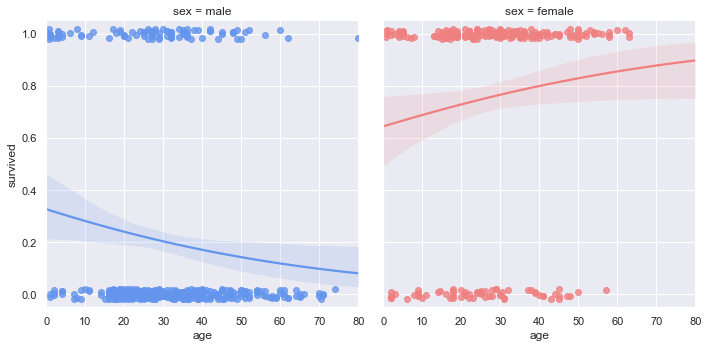

In [76]:
import seaborn as sns
sns.set(style="darkgrid")

# Load the example titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))